In [2]:
import pandas as pd
import numpy as np
import folium
import requests
import json
import os
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from pandas import json_normalize


In the "scrape_shanghai_metro.ipynb" jupyter notebook in the same github directory, all the Shanghai metro station data are obtained via webscraping, and stored in the 'metro_shanghai.csv'
details can be found there

In [4]:
metro_info_raw = 'metro_shanghai.csv'

In [5]:
column_names = ['District','Station','Latitude',"Longitude"]
metro_sta = pd.read_csv(metro_info_raw,names = column_names)
metro_sta

District                         Station   Latitude   Longitude
1    Minhang                       Xinzhuang  31.111193  121.385379
2    Minhang                       Waihuanlu  31.121413  121.393071
3    Minhang                    Lianhua Road  31.130805  121.403507
4      Xuhui                   Jinjiang Park  31.142217  121.414107
5      Xuhui  Shanghai South Railway Station  31.154579  121.430041
..       ...                             ...        ...         ...
418  Minhang                   Sanlu Highway  31.058302  121.523024
419  Minhang                     Minrui Road  31.058302  121.523024
420  Minhang                     Puhang Road  31.043175  121.526285
421  Minhang                Dongchengyi Road  31.032639  121.527812
422  Minhang                    Huizhen Road  31.027442  121.520311

[422 rows x 4 columns]

In [6]:
metro_sta = metro_sta.sort_values(by=['District'])

In [7]:
metro_sta = metro_sta.drop_duplicates(subset='Station', keep='last')
metro_sta = metro_sta.sort_values(by=['District'])
metro_sta.reset_index(drop=True,inplace=True)
metro_sta

District           Station   Latitude   Longitude
0    Baoshan     Shuichan Road  31.381302  121.488247
1    Baoshan     Gongfu Xincun  31.355082  121.434063
2    Baoshan        Hulan Road  31.339703  121.437711
3    Baoshan        Qihua Road  31.324170  121.368610
4    Baoshan    Bao'an Highway  31.369555  121.430914
..       ...               ...        ...         ...
339   Yangpu  Xinjiangwancheng  31.330300  121.502000
340   Yangpu  Jiangwan Stadium  31.305830  121.509440
341   Yangpu      Guoquan Road  31.291390  121.505560
342   Yangpu     Shiguang Road  31.323611  121.527500
343   Yangpu      Jiangpu Park  31.264500  121.523700

[344 rows x 4 columns]

In [8]:
metro_sta.groupby('District').count()

Station  Latitude  Longitude
District                               
Baoshan         29        29         29
Changning       14        14         14
Fengxian         7         7          7
Hongkou         13        13         13
Huangpu         18        18         18
Jiading         16        16         16
Jing'an         16        16         16
Minhang         37        37         37
Pudong         101       101        101
Putuo           20        20         20
Qingpu          13        13         13
Songjiang        9         9          9
Xuhui           28        28         28
Yangpu          23        23         23

In [9]:
District_station = metro_sta.groupby('District').count().drop(columns=['Latitude','Longitude'])

In [10]:
District_station = District_station.reset_index()
District_station.to_csv("District_station.csv",encoding = 'utf_8_sig')
District_station.head()

District  Station
0    Baoshan       29
1  Changning       14
2   Fengxian        7
3    Hongkou       13
4    Huangpu       18

url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json'
state_unemployment = f'{url}/US_Unemployment_Oct2012.csv'
state_data = pd.read_csv(state_unemployment)

state_data.head()

m = folium.Map(location=[48, -102], zoom_start=3)

m.choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=state_data,
    columns=['State', 'Unemployment'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Unemployment Rate (%)'
)

#folium.LayerControl().add_to(m)

m

In [11]:
District_station.head()

District  Station
0    Baoshan       29
1  Changning       14
2   Fengxian        7
3    Hongkou       13
4    Huangpu       18

In [12]:
District_price=pd.read_csv('District_price.csv')
District_price

District  Price
0     Baoshan   5848
1    Chongmin   2776
2   Changning   9804
3    Fengxian   3229
4     Hongkou   8684
5     Huangpu  12794
6     Jiading   5080
7     Jing'an   9797
8     Jinshan   2733
9     Minhang   7006
10     Pudong   7281
11      Putuo   8230
12     Qingpu   4469
13  Songjiang   4815
14      Xuhui  10329
15     Yangpu   8733

In [13]:
lat_shanghai = 31.22861111111111
lon_shanghai = 121.47472222222223

In [65]:
shanghai_geo = r'shanghaiMap.json' # geojson file

# create a plain world map
shanghai_map = folium.Map(location=[lat_shanghai, lon_shanghai], zoom_start=9.5)# tiles='Mapbox Bright'

In [66]:
# generate choropleth map using the average real estate price of each district in Shanghai - May, 2020
shanghai_map.choropleth(
    geo_data=shanghai_geo,
    data=District_price,
    columns=['District', 'Price'],
    key_on='feature.properties.Name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Average real estate price'
)

# display map
shanghai_map

In [16]:
metro_sta.to_csv('all_station.csv')

In [17]:
# Generate the Shanghai_map with all metro stations as the marker on it
for lat, lng, dist, sta in zip(metro_sta['Latitude'], metro_sta['Longitude'], metro_sta['District'], metro_sta['Station']):
    label = '{}, {}'.format(sta, dist)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=0.1,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.1,
        parse_html=False).add_to(shanghai_map)  
shanghai_map

In [1]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = ' ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 
CLIENT_SECRET: 


In [19]:
#test for one specific metro station to get all of its nearby venues
test_sta = metro_sta[metro_sta['Station']=='Loushanguan Road']
test_sta

District           Station   Latitude   Longitude
35  Changning  Loushanguan Road  31.211158  121.404058

In [20]:
# Test for one station , get its nearby venue data
station_latitude = 31.211158
station_longitude = 121.404058
station_name = 'Loushanguan Road'
print('Latitude and longitude values of {} are {}, {}.'.format(station_name, 
                                                               station_latitude, 
                                                               station_longitude))

Latitude and longitude values of Loushanguan Road are 31.211158, 121.404058.


In [21]:
radius = 500
LIMIT = 100

url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, station_latitude, station_longitude, VERSION, radius, LIMIT)

In [23]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ef61057bbdb0a49a66c3d95'},
 'response': {'headerLocation': 'Xian xiá',
  'headerFullLocation': 'Xian xiá, Shanghai',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 34,
  'suggestedBounds': {'ne': {'lat': 31.215658004500007,
    'lng': 121.40930971856945},
   'sw': {'lat': 31.206657995499995, 'lng': 121.39880628143057}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '511b1f82e4b080815a3f57df',
       'name': 'Din Tai Fung (鼎泰丰)',
       'location': {'address': '99 Xianxia Rd | 仙霞路99号',
        'crossStreet': "3/F-11 L'Avenue | 尚嘉中心",
        'lat': 31.207958772835912,
        'lng': 121.40298232210723,
        'labeledLatLngs': [{'label': 'display',
          'lat': 31.207958772835912,
          'lng': 121.402982322

In [24]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [25]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON, extend the Jaon/Dict format into the key.[key.value] column name

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

name             categories  \
0                                  Din Tai Fung (鼎泰丰)    Dumpling Restaurant   
1                                     The Place (南丰城)          Shopping Mall   
2                                       Baker & Spice                 Bakery   
3                                          Pain Chaud                 Bakery   
4                                FreshMart (鲜品馆 | 久光)            Supermarket   
5                            Bonga (Ben Jia) (本家韩国料理)      Korean Restaurant   
6                                     L'Avenue (尚嘉中心)          Shopping Mall   
7                                     Starbucks (星巴克)            Coffee Shop   
8                              Taoyuan Village (桃园眷村)   Taiwanese Restaurant   
9                                     Starbucks (星巴克)            Coffee Shop   
10  Holiday Inn Shanghai Hongqiao Central (上海虹桥君丽假...                  Hotel   
11                               Katsusei (日式猪排 静冈胜政)    Japanese Restaurant   
12                                                Olé            Supermarket   
13                                       UNIQLO (优衣库)         Clothing Store   
14                                Chez Shibata (柴田西点)           Dessert Shop   
15                           Wanda Cinema (万达影城上海虹桥店)              Multiplex   
16                                    Starbucks (星巴克)            Coffee Shop   
17                           Tianshan Tea City (天山茶城)               Tea Room   
18                                       SUBWAY (赛百味)         Sandwich Place   
19                                     Blue Frog (蓝蛙)           Burger Joint   
20                               Aniseed Saigon (大茴香)  Vietnamese Restaurant   
21                             Arch Walk Mall (金虹桥商场)          Shopping Mall   
22                                      Pho Real (真雕)  Vietnamese Restaurant   
23                                       SPICY (天辣小馆)     Chinese Restaurant   
24                                  Burger King (汉堡王)   Fast Food Restaurant   
25                                     Kushi Kin (串鑫)    Japanese Restaurant   
26                                    Starbucks (星巴克)            Coffee Shop   
27                                  Parkson Mall (百盛)          Shopping Mall   
28                                      Torishin (鳥心)    Japanese Restaurant   
29           Juchheim Baumkuchen Café (尤海姆咖啡 | ユーハイム)                 Bakery   
30  Tianshan Road & Loushan'guan Road Bus Stop (天山...               Bus Stop   
31                                    Yamazaki (山崎面包)                 Bakery   
32                           Hongqiao Tiandu (虹桥天都国际)          Shopping Mall   
33  Komeda's Coffee (Komeda's Coffee (Komeda's Cof...            Coffee Shop   

          lat         lng  
0   31.207959  121.402982  
1   31.209370  121.404100  
2   31.209522  121.403398  
3   31.207923  121.401870  
4   31.207976  121.402528  
5   31.211129  121.408895  
6   31.209364  121.404101  
7   31.208661  121.403368  
8   31.208813  121.403434  
9   31.212840  121.399850  
10  31.213889  121.403425  
11  31.211023  121.398906  
12  31.209222  121.403735  
13  31.209068  121.402514  
14  31.208450  121.400834  
15  31.209215  121.403377  
16  31.212259  121.399461  
17  31.214766  121.407003  
18  31.212761  121.399584  
19  31.209177  121.403825  
20  31.209053  121.403731  
21  31.208915  121.402491  
22  31.209435  121.402950  
23  31.209769  121.402850  
24  31.212750  121.399177  
25  31.208268  121.403637  
26  31.207515  121.402464  
27  31.212434  121.399205  
28  31.207265  121.402152  
29  31.207314  121.401994  
30  31.212661  121.399389  
31  31.207257  121.401963  
32  31.212853  121.399277  
33  31.211119  121.398808

In [26]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

34 venues were returned by Foursquare.


In [27]:
def getNearbyVenues(names, latitudes, longitudes, LIMIT=100, radius=500):
    
    venues_list=[]
    venue_csv = open('station_venues.csv','a', encoding= 'utf_8_sig')
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        try:
            # make the GET request
            results = requests.get(url).json()["response"]['groups'][0]['items']
            
            for v in results:
                venue_csv.write('{},{},{},{},{},{},{}\n'.format(name, 
                                                              lat, 
                                                              lng, 
                                                              v['venue']['name'], 
                                                              v['venue']['location']['lat'], 
                                                              v['venue']['location']['lng'],
                                                              v['venue']['categories'][0]['name']
                                                             )
                               )
            
            # return only relevant information for each nearby venue
            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['venue']['name'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name']) for v in results])
        except:
            pass

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Station', 
                  'Station Latitude', 
                  'Station Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [28]:
# type your answer here

Shanghai_metro_venues = getNearbyVenues(names=metro_sta['Station'],
                                   latitudes=metro_sta['Latitude'],
                                   longitudes=metro_sta['Longitude']
                                  )
Shanghai_metro_venues.to_csv('all_venues.csv', encoding="utf_8_sig")

Shuichan Road
Gongfu Xincun
Hulan Road
Qihua Road
Bao'an Highway
Dahuasan Road
Liuhang
Panguang Road
Luonan Xincun
Meilan Lake
Shanghai University
Nanchen Road
Shangda Road
Changzhong Road
Tonghe Xincun
Xingzhi Road
Fujin Road
West Yingao Road
Songfa Road
Zhanghuabang
Songbin Road
South Changjiang Road
Baoyang Road
Youyi Road
Tieli Road
West Youyi Road
North Jiangyang Road
Gucun Park
Dachang Town
Hongqiao Airport Terminal 1
Beixinjing
Songhong Road
Jiangsu Road
Zhongshan Park
Weining Road
Loushanguan Road
Shanghai Zoo
Hongqiao Road
West Yan'an Road
Shuicheng Road
Yili Road
Songyuan Road
Longxi Road
Xidu
Xiaotang
Fengpu Avenue
Wangyuan Road
Fengxian Xincheng
Huanchengdong Road
Jinhai Lake
Hongkou Football Stadium
Tiantong Road
International Cruise Terminal
Tilanqiao
Hailun Road
Quyang Road
Chifeng Road
Dabaishu
Jiangwan Town
Linping Road
North Sichuan Road
Dongbaoxing Road
Youdian Xincun
People's Square
Xinzha Road
South Shaanxi Road
Lujiabang Road
Dashijie
South Huangpi Road
Luban Road

In [84]:
Shanghai_metro_venues.shape

(2990, 7)

In [85]:
df_count_sta = Shanghai_metro_venues.groupby('Station').count()
df_count_sta.head()

Station Latitude  Station Longitude  Venue  Venue Latitude  \
Station                                                                      
Anshan Xincun                  6                  6      6               6   
Anting                         8                  8      8               8   
Baiyin Road                    2                  2      2               2   
Bao'an Highway                 5                  5      5               5   
Baoshan Road                  18                 18     18              18   

                Venue Longitude  Venue Category  
Station                                          
Anshan Xincun                 6               6  
Anting                        8               8  
Baiyin Road                   2               2  
Bao'an Highway                5               5  
Baoshan Road                 18              18

In [86]:
print('There are {} uniques categories.'.format(len(Shanghai_metro_venues['Venue Category'].unique())))

There are 263 uniques categories.


In [32]:
df_count_sta.head(337)

Station Latitude  Station Longitude  Venue  Venue Latitude  \
Station                                                                      
Aiguo Road                     1                  1      1               1   
Anshan Xincun                  7                  7      7               7   
Anting                         9                  9      9               9   
Baiyin Road                    3                  3      3               3   
Bao'an Highway                 6                  6      6               6   
...                          ...                ...    ...             ...   
Zhuanqiao                      5                  5      5               5   
Zhuguang Road                  1                  1      1               1   
Zhujiajiao                     5                  5      5               5   
Ziteng Road                    4                  4      4               4   
Zuibaichi Park                 1                  1      1               1   

                Venue Longitude  Venue Category  
Station                                          
Aiguo Road                    1               1  
Anshan Xincun                 7               7  
Anting                        9               9  
Baiyin Road                   3               3  
Bao'an Highway                6               6  
...                         ...             ...  
Zhuanqiao                     5               5  
Zhuguang Road                 1               1  
Zhujiajiao                    5               5  
Ziteng Road                   4               4  
Zuibaichi Park                1               1  

[336 rows x 6 columns]

In [33]:
df_count_sta.to_csv('station_venue_count.csv')

In [34]:
Shanghai_metro_venues.shape

(3196, 7)

In [35]:
Shanghai_metro_venues.head()

Station  Station Latitude  Station Longitude  \
0  Shuichan Road         31.381302         121.488247   
1  Shuichan Road         31.381302         121.488247   
2  Shuichan Road         31.381302         121.488247   
3  Shuichan Road         31.381302         121.488247   
4  Gongfu Xincun         31.355082         121.434063   

                                  Venue  Venue Latitude  Venue Longitude  \
0                                吴淞花鸟市场       31.378941       121.488119   
1                                    辣府       31.383356       121.491240   
2                                  世纪联华       31.383412       121.483668   
3  Shuichan Road Metro Station (水产路地铁站)       31.383409       121.483662   
4                         Aunt Milk Tea       31.354828       121.435022   

      Venue Category  
0        Flower Shop  
1  Hotpot Restaurant  
2      Shopping Mall  
3      Metro Station  
4    Bubble Tea Shop

In [36]:
Shanghai_metro_venues.sort_values(by=['Venue Category'])

Station  Station Latitude  Station Longitude  \
1503   Hongqiao Airport Terminal 2         31.193926         121.326508   
2708                       Longhua         31.172400         121.452400   
2116  Pudong International Airport         31.149596         121.806436   
2119  Pudong International Airport         31.149596         121.806436   
1505   Hongqiao Airport Terminal 2         31.193926         121.326508   
...                            ...               ...                ...   
1113           Middle Huaihai Road         31.221940         121.459720   
2463                Changshou Road         31.241940         121.433330   
3180              Jiangwan Stadium         31.305830         121.509440   
1278                     Qufu Road         31.244700         121.467000   
3091                   Wujiaochang         31.300280         121.510560   

                                                  Venue  Venue Latitude  \
1503  Shanghai Hongqiao International Airport (SHA) ...       31.195242   
2708                                           上海民航龙华机场       31.172190   
2116  Shanghai Pudong International Airport (PVG) (上...       31.147319   
2119                     Singapore Airlines Gold Lounge       31.152478   
1505                       V23 VIP Lounge China Eastern       31.194118   
...                                                 ...             ...   
1113                                                 甬府       31.222134   
2463                                The Grandma's (外婆家)       31.244847   
3180                                               丰和日丽       31.308378   
1278                                The Grandma's (外婆家)       31.244847   
3091                                                外婆家       31.303725   

      Venue Longitude       Venue Category  
1503       121.330068              Airport  
2708       121.451742              Airport  
2116       121.803746              Airport  
2119       121.804987       Airport Lounge  
1505       121.324987       Airport Lounge  
...               ...                  ...  
1113       121.456752  Zhejiang Restaurant  
2463       121.436404  Zhejiang Restaurant  
3180       121.506075  Zhejiang Restaurant  
1278       121.467510  Zhejiang Restaurant  
3091       121.511094  Zhejiang Restaurant  

[3196 rows x 7 columns]

In [37]:
# All venue categories 
Shanghai_metro_venues['Venue Category'].unique()

array(['Flower Shop', 'Hotpot Restaurant', 'Shopping Mall',
       'Metro Station', 'Bubble Tea Shop', 'Coffee Shop', 'Hotel',
       'Supermarket', 'Pizza Place', 'Dumpling Restaurant',
       'Movie Theater', 'Chinese Restaurant', 'Asian Restaurant', 'Park',
       'Fast Food Restaurant', 'Big Box Store', 'Plaza', 'Juice Bar',
       'Café', 'Stadium', 'Bookstore', 'Convenience Store',
       'Massage Studio', 'Cosmetics Shop', 'Noodle House',
       'Basketball Court', 'Hardware Store', 'Grocery Store', 'Bus Stop',
       'Beer Bar', 'Recreation Center', 'Art Gallery', 'Bakery', 'Museum',
       'Gym', 'Office', 'Department Store', 'Shanghai Restaurant',
       'Food Stand', 'Furniture / Home Store', 'Scandinavian Restaurant',
       'Airport Lounge', 'Airport Service', 'Japanese Restaurant',
       'Gift Shop', 'Travel Lounge', 'Airport Terminal',
       'Macanese Restaurant', 'Hostel', 'Motel', 'Bath House',
       'Shopping Plaza', 'Italian Restaurant',
       'Modern European Re

In [38]:
# The top 10 venue categories
Shanghai_metro_venues.groupby('Venue Category')['Venue'].count().nlargest(10)

Venue Category
Coffee Shop             309
Metro Station           206
Chinese Restaurant      197
Hotel                   190
Fast Food Restaurant    168
Shopping Mall           102
Café                     93
Japanese Restaurant      84
Convenience Store        51
Bakery                   50
Name: Venue, dtype: int64

In [39]:
# number of each category 
Shanghai_metro_venues['Venue Category'].value_counts()

Coffee Shop                   309
Metro Station                 206
Chinese Restaurant            197
Hotel                         190
Fast Food Restaurant          168
                             ... 
Modern European Restaurant      1
Other Nightlife                 1
Swiss Restaurant                1
Tourist Information Center      1
Hawaiian Restaurant             1
Name: Venue Category, Length: 264, dtype: int64

In [40]:
#Remove the venue category of "Metro Station" as it is the station itself when we want to get its nearby venue only
Shanghai_metro_venues = Shanghai_metro_venues[Shanghai_metro_venues['Venue Category'] != 'Metro Station']
Shanghai_metro_venues['Venue Category'].value_counts()

Coffee Shop             309
Chinese Restaurant      197
Hotel                   190
Fast Food Restaurant    168
Shopping Mall           102
                       ... 
Pool Hall                 1
Buddhist Temple           1
Toll Plaza                1
Smoothie Shop             1
Hawaiian Restaurant       1
Name: Venue Category, Length: 263, dtype: int64

In [41]:
# one hot encoding
Shanghai_metro_onehot = pd.get_dummies(Shanghai_metro_venues[['Venue Category']], prefix='', prefix_sep='')
Shanghai_metro_onehot.shape

(2990, 263)

In [42]:
Shanghai_metro_onehot.head()

Airport  Airport Lounge  Airport Service  Airport Terminal  \
0        0               0                0                 0   
1        0               0                0                 0   
2        0               0                0                 0   
4        0               0                0                 0   
7        0               0                0                 0   

   American Restaurant  Antique Shop  Arcade  Art Gallery  Art Museum  \
0                    0             0       0            0           0   
1                    0             0       0            0           0   
2                    0             0       0            0           0   
4                    0             0       0            0           0   
7                    0             0       0            0           0   

   Arts & Crafts Store  ...  Vietnamese Restaurant  Watch Shop  Waterfront  \
0                    0  ...                      0           0           0   
1                    0  ...                      0           0           0   
2                    0  ...                      0           0           0   
4                    0  ...                      0           0           0   
7                    0  ...                      0           0           0   

   Whisky Bar  Wine Bar  Wine Shop  Xinjiang Restaurant  Yoga Studio  \
0           0         0          0                    0            0   
1           0         0          0                    0            0   
2           0         0          0                    0            0   
4           0         0          0                    0            0   
7           0         0          0                    0            0   

   Yunnan Restaurant  Zhejiang Restaurant  
0                  0                    0  
1                  0                    0  
2                  0                    0  
4                  0                    0  
7                  0                    0  

[5 rows x 263 columns]

In [43]:
#add Station column back to dataframe
Shanghai_metro_onehot['Station'] = Shanghai_metro_venues['Station']
Shanghai_metro_onehot.head()

Airport  Airport Lounge  Airport Service  Airport Terminal  \
0        0               0                0                 0   
1        0               0                0                 0   
2        0               0                0                 0   
4        0               0                0                 0   
7        0               0                0                 0   

   American Restaurant  Antique Shop  Arcade  Art Gallery  Art Museum  \
0                    0             0       0            0           0   
1                    0             0       0            0           0   
2                    0             0       0            0           0   
4                    0             0       0            0           0   
7                    0             0       0            0           0   

   Arts & Crafts Store  ...  Watch Shop  Waterfront  Whisky Bar  Wine Bar  \
0                    0  ...           0           0           0         0   
1                    0  ...           0           0           0         0   
2                    0  ...           0           0           0         0   
4                    0  ...           0           0           0         0   
7                    0  ...           0           0           0         0   

   Wine Shop  Xinjiang Restaurant  Yoga Studio  Yunnan Restaurant  \
0          0                    0            0                  0   
1          0                    0            0                  0   
2          0                    0            0                  0   
4          0                    0            0                  0   
7          0                    0            0                  0   

   Zhejiang Restaurant        Station  
0                    0  Shuichan Road  
1                    0  Shuichan Road  
2                    0  Shuichan Road  
4                    0  Gongfu Xincun  
7                    0     Hulan Road  

[5 rows x 264 columns]

In [44]:
#move Station column to the first column
fixed_columns = [Shanghai_metro_onehot.columns[-1]] + list(Shanghai_metro_onehot.columns[:-1])
Shanghai_onehot = Shanghai_metro_onehot[fixed_columns]
Shanghai_onehot.head()

Station  Airport  Airport Lounge  Airport Service  Airport Terminal  \
0  Shuichan Road        0               0                0                 0   
1  Shuichan Road        0               0                0                 0   
2  Shuichan Road        0               0                0                 0   
4  Gongfu Xincun        0               0                0                 0   
7     Hulan Road        0               0                0                 0   

   American Restaurant  Antique Shop  Arcade  Art Gallery  Art Museum  ...  \
0                    0             0       0            0           0  ...   
1                    0             0       0            0           0  ...   
2                    0             0       0            0           0  ...   
4                    0             0       0            0           0  ...   
7                    0             0       0            0           0  ...   

   Vietnamese Restaurant  Watch Shop  Waterfront  Whisky Bar  Wine Bar  \
0                      0           0           0           0         0   
1                      0           0           0           0         0   
2                      0           0           0           0         0   
4                      0           0           0           0         0   
7                      0           0           0           0         0   

   Wine Shop  Xinjiang Restaurant  Yoga Studio  Yunnan Restaurant  \
0          0                    0            0                  0   
1          0                    0            0                  0   
2          0                    0            0                  0   
4          0                    0            0                  0   
7          0                    0            0                  0   

   Zhejiang Restaurant  
0                    0  
1                    0  
2                    0  
4                    0  
7                    0  

[5 rows x 264 columns]

In [45]:
Shanghai_onehot.shape

(2990, 264)

In [46]:
#Next, let's group rows by stations and by taking the mean of the frequency of occurrence of each category
#get the average value of each venue catetory of each station by groupby.mean
Shanghai_grouped = Shanghai_onehot.groupby('Station').mean().reset_index()

In [47]:
Shanghai_grouped

Station  Airport  Airport Lounge  Airport Service  \
0     Anshan Xincun      0.0             0.0              0.0   
1            Anting      0.0             0.0              0.0   
2       Baiyin Road      0.0             0.0              0.0   
3    Bao'an Highway      0.0             0.0              0.0   
4      Baoshan Road      0.0             0.0              0.0   
..              ...      ...             ...              ...   
300    Zhouhai Road      0.0             0.0              0.0   
301       Zhuanqiao      0.0             0.0              0.0   
302      Zhujiajiao      0.0             0.0              0.0   
303     Ziteng Road      0.0             0.0              0.0   
304  Zuibaichi Park      0.0             0.0              0.0   

     Airport Terminal  American Restaurant  Antique Shop  Arcade  Art Gallery  \
0                 0.0                  0.0           0.0     0.0          0.0   
1                 0.0                  0.0           0.0     0.0          0.0   
2                 0.0                  0.0           0.0     0.0          0.0   
3                 0.0                  0.0           0.0     0.0          0.0   
4                 0.0                  0.0           0.0     0.0          0.0   
..                ...                  ...           ...     ...          ...   
300               0.0                  0.0           0.0     0.0          0.0   
301               0.0                  0.0           0.0     0.0          0.0   
302               0.0                  0.0           0.0     0.0          0.0   
303               0.0                  0.0           0.0     0.0          0.0   
304               0.0                  0.0           0.0     0.0          0.0   

     Art Museum  ...  Vietnamese Restaurant  Watch Shop  Waterfront  \
0          0.00  ...                    0.0        0.00         0.0   
1          0.00  ...                    0.0        0.00         0.0   
2          0.00  ...                    0.0        0.00         0.0   
3          0.00  ...                    0.0        0.00         0.0   
4          0.00  ...                    0.0        0.00         0.0   
..          ...  ...                    ...         ...         ...   
300        0.00  ...                    0.0        0.00         0.0   
301        0.00  ...                    0.0        0.00         0.0   
302        0.25  ...                    0.0        0.00         0.0   
303        0.00  ...                    0.0        0.25         0.0   
304        0.00  ...                    0.0        0.00         0.0   

     Whisky Bar  Wine Bar  Wine Shop  Xinjiang Restaurant  Yoga Studio  \
0           0.0       0.0        0.0                  0.0          0.0   
1           0.0       0.0        0.0                  0.0          0.0   
2           0.0       0.0        0.0                  0.0          0.0   
3           0.0       0.0        0.0                  0.0          0.0   
4           0.0       0.0        0.0                  0.0          0.0   
..          ...       ...        ...                  ...          ...   
300         0.0       0.0        0.0                  0.0          0.0   
301         0.0       0.0        0.0                  0.0          0.0   
302         0.0       0.0        0.0                  0.0          0.0   
303         0.0       0.0        0.0                  0.0          0.0   
304         0.0       0.0        0.0                  0.0          0.0   

     Yunnan Restaurant  Zhejiang Restaurant  
0                  0.0                  0.0  
1                  0.0                  0.0  
2                  0.0                  0.0  
3                  0.0                  0.0  
4                  0.0                  0.0  
..                 ...                  ...  
300                0.0                  0.0  
301                0.0                  0.0  
302                0.0                  0.0  
303                0.0                  0.0  
304       

In [48]:
Shanghai_grouped.shape


(305, 264)

In [49]:
Shanghai_grouped['Station']

0       Anshan Xincun
1              Anting
2         Baiyin Road
3      Bao'an Highway
4        Baoshan Road
            ...      
300      Zhouhai Road
301         Zhuanqiao
302        Zhujiajiao
303       Ziteng Road
304    Zuibaichi Park
Name: Station, Length: 305, dtype: object

Get the top 10 most common venue categories of each station 

In [50]:
place0 = Shanghai_grouped['Station'][0]
place0

'Anshan Xincun'

In [51]:
temp0 = Shanghai_grouped[Shanghai_grouped['Station'] == place0].T.reset_index()
temp0

index              0
0                Station  Anshan Xincun
1                Airport              0
2         Airport Lounge              0
3        Airport Service              0
4       Airport Terminal              0
..                   ...            ...
259            Wine Shop              0
260  Xinjiang Restaurant              0
261          Yoga Studio              0
262    Yunnan Restaurant              0
263  Zhejiang Restaurant              0

[264 rows x 2 columns]

In [52]:
temp0.columns=['venue','freq']
temp0

venue           freq
0                Station  Anshan Xincun
1                Airport              0
2         Airport Lounge              0
3        Airport Service              0
4       Airport Terminal              0
..                   ...            ...
259            Wine Shop              0
260  Xinjiang Restaurant              0
261          Yoga Studio              0
262    Yunnan Restaurant              0
263  Zhejiang Restaurant              0

[264 rows x 2 columns]

In [53]:
temp0 = temp0.iloc[1:]
temp0

venue freq
1                Airport    0
2         Airport Lounge    0
3        Airport Service    0
4       Airport Terminal    0
5    American Restaurant    0
..                   ...  ...
259            Wine Shop    0
260  Xinjiang Restaurant    0
261          Yoga Studio    0
262    Yunnan Restaurant    0
263  Zhejiang Restaurant    0

[263 rows x 2 columns]

In [54]:
temp0['freq'] = temp0['freq'].astype(float)
temp0 = temp0.round({'freq': 2})

/Users/kennysheng/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [70]:
'''
for hook in manhattan_grouped['Neighborhood']:
    print("----"+store+"----")
    temp = manhattan_grouped[manhattan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')
'''

num_top_venues = 8
for place in Shanghai_grouped['Station']:
    print('-----' + place + '-----')
    temp = Shanghai_grouped[Shanghai_grouped['Station'] == place].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq',ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')
    

-----Anshan Xincun-----
                 venue  freq
0          Pizza Place  0.17
1          Coffee Shop  0.17
2               Bakery  0.17
3   Italian Restaurant  0.17
4       Shopping Plaza  0.17
5        Shopping Mall  0.17
6  Peruvian Restaurant  0.00
7   Photography Studio  0.00


-----Anting-----
                  venue  freq
0           Coffee Shop  0.25
1         Shopping Mall  0.12
2                   Bar  0.12
3          Dessert Shop  0.12
4    Italian Restaurant  0.12
5  Fast Food Restaurant  0.12
6                 Hotel  0.12
7               Airport  0.00


-----Baiyin Road-----
               venue  freq
0             Garden   0.5
1              Hotel   0.5
2            Airport   0.0
3           Pie Shop   0.0
4       Optical Shop   0.0
5    Other Nightlife   0.0
6  Outdoor Sculpture   0.0
7       Outlet Store   0.0


-----Bao'an Highway-----
                   venue  freq
0            Pizza Place   0.2
1            Coffee Shop   0.2
2    Dumpling Restaurant   0.2
3       

                venue  freq
0         Coffee Shop   0.2
1              Lounge   0.2
2                Food   0.2
3  Chinese Restaurant   0.2
4               Hotel   0.2
5             Airport   0.0
6           Pet Store   0.0
7            Pie Shop   0.0


-----Dapuqiao-----
                  venue  freq
0                  Café  0.14
1                   Bar  0.06
2           Coffee Shop  0.06
3  Taiwanese Restaurant  0.06
4                   Spa  0.06
5    Chinese Restaurant  0.06
6  Cantonese Restaurant  0.03
7   Szechuan Restaurant  0.03


-----Dashijie-----
                     venue  freq
0                    Hotel  0.10
1                     Park  0.10
2       Chinese Restaurant  0.10
3             Noodle House  0.05
4                   Museum  0.05
5             Concert Hall  0.05
6  New American Restaurant  0.05
7         Department Store  0.05


-----Deping Road-----
                   venue  freq
0     Rock Climbing Spot  0.33
1     Chinese Restaurant  0.33
2     Athletics & Spor

                  venue  freq
0  Fast Food Restaurant  0.33
1         Shopping Mall  0.33
2   Shanghai Restaurant  0.33
3                  Pier  0.00
4    Photography Studio  0.00
5              Pharmacy  0.00
6             Pet Store  0.00
7   Peruvian Restaurant  0.00


-----Guilin Park-----
                    venue  freq
0    Fast Food Restaurant  0.50
1     Dumpling Restaurant  0.25
2                    Café  0.25
3                 Airport  0.00
4  Peking Duck Restaurant  0.00
5      Photography Studio  0.00
6                Pharmacy  0.00
7               Pet Store  0.00


-----Guilin Road-----
                 venue  freq
0   Chinese Restaurant  0.15
1          Karaoke Bar  0.08
2     Ramen Restaurant  0.08
3       Breakfast Spot  0.08
4                  Spa  0.08
5                Hotel  0.08
6               Bakery  0.08
7  Shanghai Restaurant  0.08


-----Guoquan Road-----
                 venue  freq
0   Chinese Restaurant  0.33
1    French Restaurant  0.17
2                 Par

                   venue  freq
0          Grocery Store  0.33
1            Coffee Shop  0.33
2          Shopping Mall  0.33
3                Airport  0.00
4  Performing Arts Venue  0.00
5     Photography Studio  0.00
6               Pharmacy  0.00
7              Pet Store  0.00


-----Jiaotong University-----
                 venue  freq
0          Coffee Shop  0.10
1   Chinese Restaurant  0.07
2                 Café  0.07
3         Cocktail Bar  0.05
4             Tea Room  0.05
5  Shanghai Restaurant  0.05
6               Bakery  0.05
7                Hotel  0.02


-----Jiashan Road-----
                  venue  freq
0                 Hotel  0.22
1               Stadium  0.11
2           Coffee Shop  0.11
3           Pizza Place  0.11
4    Chinese Restaurant  0.11
5         Bowling Alley  0.11
6  Gym / Fitness Center  0.11
7                  Café  0.11


-----Jing'an Temple-----
                 venue  freq
0  Japanese Restaurant  0.06
1          Coffee Shop  0.06
2      Thai Restaur

                 venue  freq
0              Airport  0.33
1          Coffee Shop  0.33
2   Chinese Restaurant  0.33
3  Peruvian Restaurant  0.00
4             Pie Shop  0.00
5   Photography Studio  0.00
6             Pharmacy  0.00
7            Pet Store  0.00


-----Longxi Road-----
                     venue  freq
0              Coffee Shop  0.17
1                     Café  0.17
2      Japanese Restaurant  0.17
3             Intersection  0.08
4  Comfort Food Restaurant  0.08
5        Convenience Store  0.08
6       Chinese Restaurant  0.08
7                    Hotel  0.08


-----Longyang Road-----
                  venue  freq
0  Fast Food Restaurant  0.25
1        Hardware Store  0.12
2         Train Station  0.12
3      Ramen Restaurant  0.12
4   Sporting Goods Shop  0.12
5         Shopping Mall  0.12
6                Museum  0.12
7      Pedestrian Plaza  0.00


-----Loushanguan Road-----
                   venue  freq
0          Shopping Mall  0.15
1            Coffee Shop  0.15


                  venue  freq
0  Fast Food Restaurant  0.33
1           Coffee Shop  0.17
2    Chinese Restaurant  0.17
3         Movie Theater  0.17
4         Shopping Mall  0.17
5               Airport  0.00
6             Pet Store  0.00
7    Photography Studio  0.00


-----North Zhongshan Road-----
                venue  freq
0               Hotel  0.50
1  Athletics & Sports  0.25
2         Karaoke Bar  0.25
3        Optical Shop  0.00
4     Other Nightlife  0.00
5   Outdoor Sculpture  0.00
6        Outlet Store  0.00
7                Park  0.00


-----Oriental Land-----
               venue  freq
0               Park   0.5
1         Campground   0.5
2            Airport   0.0
3           Pie Shop   0.0
4             Office   0.0
5       Optical Shop   0.0
6    Other Nightlife   0.0
7  Outdoor Sculpture   0.0


-----Oriental Sports Center-----
                    venue  freq
0             Coffee Shop  0.67
1                 Stadium  0.33
2  Peking Duck Restaurant  0.00
3      Photog

                  venue  freq
0           Coffee Shop  0.27
1          Soccer Field  0.09
2  Fast Food Restaurant  0.09
3           Pizza Place  0.09
4         Movie Theater  0.09
5                  Pool  0.09
6                 Hotel  0.09
7      Asian Restaurant  0.09


-----Shanghai University-----
                 venue  freq
0            Juice Bar   0.2
1          Coffee Shop   0.2
2                 Café   0.2
3                Plaza   0.2
4                Hotel   0.2
5              Airport   0.0
6  Peruvian Restaurant   0.0
7   Photography Studio   0.0


-----Shanghai Zoo-----
                 venue  freq
0   Chinese Restaurant   0.4
1    Convenience Store   0.4
2            Pet Store   0.2
3              Airport   0.0
4  Peruvian Restaurant   0.0
5             Pie Shop   0.0
6   Photography Studio   0.0
7             Pharmacy   0.0


-----Shangnan Road-----
                 venue  freq
0    Convenience Store  0.25
1   Chinese Restaurant  0.25
2                Motel  0.25
3  Rental

7      Pedestrian Plaza  0.00


-----Tilanqiao-----
                     venue  freq
0                    Hotel  0.20
1        Convenience Store  0.13
2                     Café  0.07
3  Chinese Breakfast Place  0.07
4              Coffee Shop  0.07
5                     Pier  0.07
6                Bookstore  0.07
7           History Museum  0.07


-----Tonghe Xincun-----
                  venue  freq
0          Noodle House  0.17
1  Fast Food Restaurant  0.17
2         Movie Theater  0.17
3         Shopping Mall  0.17
4        Cosmetics Shop  0.17
5      Basketball Court  0.17
6     Recreation Center  0.00
7              Pie Shop  0.00


-----Tongji University-----
                   venue  freq
0                  Hotel  0.25
1                   Café  0.17
2  College Arts Building  0.08
3     Seafood Restaurant  0.08
4      Outdoor Sculpture  0.08
5            Bus Station  0.08
6         Shopping Plaza  0.08
7    Szechuan Restaurant  0.08


-----Waihuanlu-----
                 venue  

                  venue  freq
0  Fast Food Restaurant  0.11
1    Chinese Restaurant  0.10
2                 Hotel  0.08
3           Coffee Shop  0.08
4                Lounge  0.04
5   Dumpling Restaurant  0.04
6   Shanghai Restaurant  0.03
7                Bakery  0.03


-----Xinzhuang-----
                  venue  freq
0   Zhejiang Restaurant  0.12
1  Fast Food Restaurant  0.12
2          Noodle House  0.12
3             Multiplex  0.12
4           Coffee Shop  0.12
5                Bakery  0.12
6         Shopping Mall  0.12
7          Burger Joint  0.12


-----Xiuyan Road-----
                   venue  freq
0                  Hotel  0.33
1     Chinese Restaurant  0.33
2          Historic Site  0.33
3                Airport  0.00
4  Performing Arts Venue  0.00
5               Pharmacy  0.00
6              Pet Store  0.00
7    Peruvian Restaurant  0.00


-----Xuelin Road-----
                    venue  freq
0           Auto Workshop   1.0
1                 Airport   0.0
2  Peking Duck 

7  Performing Arts Venue  0.00


-----Zhuanqiao-----
                  venue  freq
0   Shanghai Restaurant  0.25
1    Chinese Restaurant  0.25
2              Gym Pool  0.25
3  Fast Food Restaurant  0.25
4      Pedestrian Plaza  0.00
5              Pharmacy  0.00
6             Pet Store  0.00
7   Peruvian Restaurant  0.00


-----Zhujiajiao-----
                    venue  freq
0      Chinese Restaurant  0.50
1              Art Museum  0.25
2                Pharmacy  0.25
3  Peking Duck Restaurant  0.00
4      Photography Studio  0.00
5               Pet Store  0.00
6     Peruvian Restaurant  0.00
7   Performing Arts Venue  0.00


-----Ziteng Road-----
               venue  freq
0        Coffee Shop  0.25
1  Korean Restaurant  0.25
2              Hotel  0.25
3         Watch Shop  0.25
4    Other Nightlife  0.00
5  Outdoor Sculpture  0.00
6       Outlet Store  0.00
7               Park  0.00


-----Zuibaichi Park-----
               venue  freq
0               Park   1.0
1            Airpo

In [71]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

In [72]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Station']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
stations_venues_sorted = pd.DataFrame(columns=columns)
stations_venues_sorted['Station'] = Shanghai_grouped['Station']

for ind in np.arange(Shanghai_grouped.shape[0]):
    stations_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Shanghai_grouped.iloc[ind, :], num_top_venues)

stations_venues_sorted.head()

Station 1st Most Common Venue 2nd Most Common Venue  \
0   Anshan Xincun        Shopping Plaza    Italian Restaurant   
1          Anting           Coffee Shop                   Bar   
2     Baiyin Road                 Hotel                Garden   
3  Bao'an Highway           Supermarket   Dumpling Restaurant   
4    Baoshan Road           Coffee Shop  Fast Food Restaurant   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0                Bakery         Shopping Mall           Coffee Shop   
1    Italian Restaurant          Dessert Shop                 Hotel   
2                  Food             Gastropub         Garden Center   
3           Coffee Shop         Movie Theater           Pizza Place   
4    Chinese Restaurant        Clothing Store                  Café   

  6th Most Common Venue   7th Most Common Venue 8th Most Common Venue  \
0           Pizza Place                Fountain     Food & Drink Shop   
1         Shopping Mall    Fast Food Restaurant     French Restaurant   
2           Gaming Cafe  Furniture / Home Store     Fujian Restaurant   
3   Zhejiang Restaurant      Frozen Yogurt Shop              Fountain   
4   Fried Chicken Joint        Basketball Court          Burger Joint   

     9th Most Common Venue 10th Most Common Venue  
0               Food Court             Food Stand  
1               Food Court             Food Stand  
2  Fruit & Vegetable Store     Frozen Yogurt Shop  
3        French Restaurant    Fried Chicken Joint  
4            Shopping Mall    Filipino Restaurant

In [73]:
Shanghai_grouped_clustering = Shanghai_grouped.drop('Station', 1)
Shanghai_grouped_clustering

Airport  Airport Lounge  Airport Service  Airport Terminal  \
0        0.0             0.0              0.0               0.0   
1        0.0             0.0              0.0               0.0   
2        0.0             0.0              0.0               0.0   
3        0.0             0.0              0.0               0.0   
4        0.0             0.0              0.0               0.0   
..       ...             ...              ...               ...   
300      0.0             0.0              0.0               0.0   
301      0.0             0.0              0.0               0.0   
302      0.0             0.0              0.0               0.0   
303      0.0             0.0              0.0               0.0   
304      0.0             0.0              0.0               0.0   

     American Restaurant  Antique Shop  Arcade  Art Gallery  Art Museum  \
0                    0.0           0.0     0.0          0.0        0.00   
1                    0.0           0.0     0.0          0.0        0.00   
2                    0.0           0.0     0.0          0.0        0.00   
3                    0.0           0.0     0.0          0.0        0.00   
4                    0.0           0.0     0.0          0.0        0.00   
..                   ...           ...     ...          ...         ...   
300                  0.0           0.0     0.0          0.0        0.00   
301                  0.0           0.0     0.0          0.0        0.00   
302                  0.0           0.0     0.0          0.0        0.25   
303                  0.0           0.0     0.0          0.0        0.00   
304                  0.0           0.0     0.0          0.0        0.00   

     Arts & Crafts Store  ...  Vietnamese Restaurant  Watch Shop  Waterfront  \
0                    0.0  ...                    0.0        0.00         0.0   
1                    0.0  ...                    0.0        0.00         0.0   
2                    0.0  ...                    0.0        0.00         0.0   
3                    0.0  ...                    0.0        0.00         0.0   
4                    0.0  ...                    0.0        0.00         0.0   
..                   ...  ...                    ...         ...         ...   
300                  0.0  ...                    0.0        0.00         0.0   
301                  0.0  ...                    0.0        0.00         0.0   
302                  0.0  ...                    0.0        0.00         0.0   
303                  0.0  ...                    0.0        0.25         0.0   
304                  0.0  ...                    0.0        0.00         0.0   

     Whisky Bar  Wine Bar  Wine Shop  Xinjiang Restaurant  Yoga Studio  \
0           0.0       0.0        0.0                  0.0          0.0   
1           0.0       0.0        0.0                  0.0          0.0   
2           0.0       0.0        0.0                  0.0          0.0   
3           0.0       0.0        0.0                  0.0          0.0   
4           0.0       0.0        0.0                  0.0          0.0   
..          ...       ...        ...                  ...          ...   
300         0.0       0.0        0.0                  0.0          0.0   
301         0.0       0.0        0.0                  0.0          0.0   
302         0.0       0.0        0.0                  0.0          0.0   
303         0.0       0.0        0.0                  0.0          0.0   
304         0.0       0.0        0.0                  0.0          0.0   

     Yunnan Restaurant  Zhejiang Restaurant  
0                  0.0                  0.0  
1                  0.0                  0.0  
2                  0.0                  0.0  
3                  0.0                  0.0  
4                  0.0                  0.0  
..                 ...                  ...  
300                0.0                  0.0  
301                0.0                  0.0  
302                0.0             

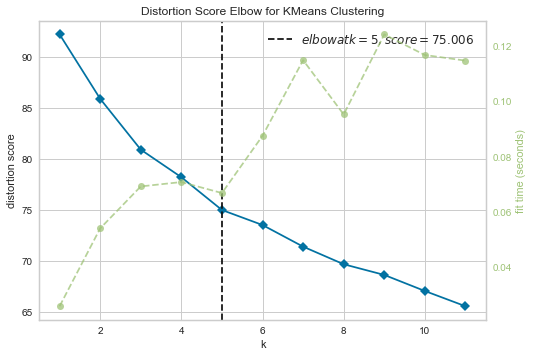

In [74]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
visualizer = KElbowVisualizer(KMeans(), k=(1, 12), metric='distortion')
visualizer.fit(Shanghai_grouped_clustering)        
visualizer.show()

In [75]:
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Shanghai_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
len(kmeans.labels_)

305

In [76]:
# add clustering labels
'''
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

manhattan_merged = manhattan_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

manhattan_merged.head() # check the last columns!
'''

#stations_venues_sorted.insert(0,'Cluster Label',kmeans.labels_)

Shanghai_merged = stations_venues_sorted
Shanghai_merged['Cluster Label'] = kmeans.labels_
Shanghai_merged = pd.merge(metro_sta, Shanghai_merged, on='Station' )



In [77]:
#stations_venues_sorted.drop(columns=['Cluster Label'],inplace=True)

In [78]:
Shanghai_merged

District           Station   Latitude   Longitude 1st Most Common Venue  \
0    Baoshan     Shuichan Road  31.381302  121.488247           Flower Shop   
1    Baoshan     Gongfu Xincun  31.355082  121.434063       Bubble Tea Shop   
2    Baoshan        Hulan Road  31.339703  121.437711                 Hotel   
3    Baoshan    Bao'an Highway  31.369555  121.430914           Supermarket   
4    Baoshan     Dahuasan Road  31.276400  121.418000    Chinese Restaurant   
..       ...               ...        ...         ...                   ...   
300   Yangpu  Xinjiangwancheng  31.330300  121.502000   Szechuan Restaurant   
301   Yangpu  Jiangwan Stadium  31.305830  121.509440           Coffee Shop   
302   Yangpu      Guoquan Road  31.291390  121.505560    Chinese Restaurant   
303   Yangpu     Shiguang Road  31.323611  121.527500                 Hotel   
304   Yangpu      Jiangpu Park  31.264500  121.523700    Chinese Restaurant   

    2nd Most Common Venue 3rd Most Common Venue    4th Most Common Venue  \
0       Hotpot Restaurant         Shopping Mall                     Food   
1       Food & Drink Shop               Gay Bar                Gastropub   
2             Coffee Shop   Fried Chicken Joint        Food & Drink Shop   
3     Dumpling Restaurant           Coffee Shop            Movie Theater   
4             Coffee Shop      Asian Restaurant      Zhejiang Restaurant   
..                    ...                   ...                      ...   
300         Movie Theater      Department Store               Food Stand   
301                  Café    Chinese Restaurant     Fast Food Restaurant   
302                  Park     Convenience Store                Pet Store   
303       Badminton Court    Frozen Yogurt Shop               Food Court   
304           Coffee Shop                Museum  Fruit & Vegetable Store   

    5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0       Food & Drink Shop            Food Court            Food Stand   
1           Garden Center                Garden           Gaming Cafe   
2              Food Court            Food Stand              Fountain   
3             Pizza Place   Zhejiang Restaurant    Frozen Yogurt Shop   
4       Food & Drink Shop            Food Stand              Fountain   
..                    ...                   ...                   ...   
300              Fountain     French Restaurant   Fried Chicken Joint   
301             Bookstore         Shopping Mall   Zhejiang Restaurant   
302     French Restaurant            Food Stand              Fountain   
303            Food Stand              Fountain     French Restaurant   
304            Food Stand              Fountain     French Restaurant   

         8th Most Common Venue    9th Most Common Venue  \
0                     Fountain        French Restaurant   
1       Furniture / Home Store        Fujian Restaurant   
2            French Restaurant       Frozen Yogurt Shop   
3                     Fountain        French Restaurant   
4            French Restaurant      Fried Chicken Joint   
..                         ...                      ...   
300         Frozen Yogurt Shop  Fruit & Vegetable Store   
301  Japanese Curry Restaurant      Japanese Restaurant   
302        Fried Chicken Joint      Zhejiang Restaurant   
303        Fried Chicken Joint  Fruit & Vegetable Store   
304        Fried Chicken Joint       Frozen Yogurt Shop   

      10th Most Common Venue  Cluster Label  
0        Zhejiang Restaurant              1  
1    Fruit & Vegetable Store              4  
2                Flower Shop              0  
3        Fried Chicken Joint              4  
4         Frozen Yogurt Shop              0  
..                       ...            ...  
300        Fujian Restaurant              4  
301                      Gym              4  
302        Food & Drink Shop              3  
303                     Food              2  
304      Zhejiang Restaurant              0  

[30

In [67]:
shanghai_map

In [79]:
Shanghai_merged.groupby('Cluster Label')['Station'].count()

Cluster Label
0     50
1     19
2     30
3     23
4    183
Name: Station, dtype: int64

In [80]:
# create map
map_shanghai_clusters = folium.Map(location=[lat_shanghai, lon_shanghai], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
print ("colors_array = {}".format(colors_array))
rainbow = [colors.rgb2hex(i) for i in colors_array]
rainbow =[ '#8000ff', '#2AFEF4', '#80ffb4', '#FBFCFC',  '#F9E79F']
print ("rainbow = {}".format(rainbow))

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Shanghai_merged['Latitude'], Shanghai_merged['Longitude'], Shanghai_merged['Station'], Shanghai_merged['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=1,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(shanghai_map)
       
shanghai_map

colors_array = [[5.00000000e-01 0.00000000e+00 1.00000000e+00 1.00000000e+00]
 [1.96078431e-03 7.09281308e-01 9.23289106e-01 1.00000000e+00]
 [5.03921569e-01 9.99981027e-01 7.04925547e-01 1.00000000e+00]
 [1.00000000e+00 7.00543038e-01 3.78411050e-01 1.00000000e+00]
 [1.00000000e+00 1.22464680e-16 6.12323400e-17 1.00000000e+00]]
rainbow = ['#8000ff', '#2AFEF4', '#80ffb4', '#FBFCFC', '#F9E79F']


In [87]:
grouped = Shanghai_merged[['Station',
                     'Cluster Label',
                     '1st Most Common Venue', 
                     '2nd Most Common Venue', 
                     '3rd Most Common Venue',
                     '4th Most Common Venue',
                     '5th Most Common Venue','6th Most Common Venue'
                    ]]

grouped.loc[:, 'Top Venues'] = grouped.apply(lambda x: ", ".join(x.iloc[2:5]), axis=1)
grouped = grouped.drop(['1st Most Common Venue', 
                        '2nd Most Common Venue', 
                        '3rd Most Common Venue',
                     '4th Most Common Venue',
                     '5th Most Common Venue','6th Most Common Venue'], axis=1)
def mix(group):
    return ', '.join(group['Top Venues'].tolist())
top_venues = grouped.groupby('Cluster Label').apply(mix)

c0dist = grouped.groupby('Cluster Label').get_group(0).shape[0]
clr0 = pd.Series(top_venues[0].split(', '), name='Cluster 0').value_counts().nlargest(10)/c0dist
c1dist = grouped.groupby('Cluster Label').get_group(1).shape[0]
clr1 = pd.Series(top_venues[1].split(', '), name='Cluster 1').value_counts().nlargest(10)/c1dist
c2dist = grouped.groupby('Cluster Label').get_group(2).shape[0]
clr2 = pd.Series(top_venues[2].split(', '), name='Cluster 2').value_counts().nlargest(10)/c2dist
c3dist = grouped.groupby('Cluster Label').get_group(3).shape[0]
clr3 = pd.Series(top_venues[3].split(', '), name='Cluster 3').value_counts().nlargest(10)/c3dist
c4dist = grouped.groupby('Cluster Label').get_group(4).shape[0]
clr4 = pd.Series(top_venues[4].split(', '), name='Cluster 4').value_counts().nlargest(10)/c4dist

/Users/kennysheng/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/kennysheng/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

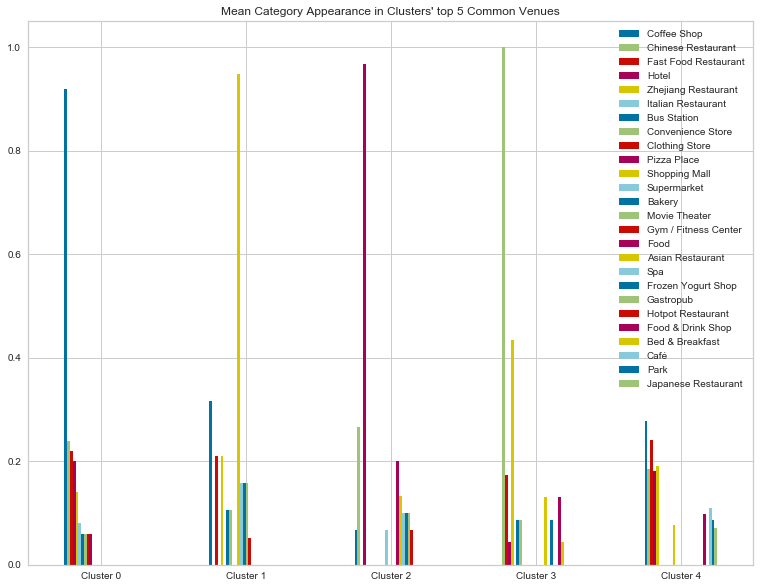

In [90]:
ax = pd.concat([clr0,clr1,clr2,clr3,clr4], sort=False, axis=1).transpose().plot(kind='bar', figsize=(13, 10))
plt.title("Mean Category Appearance in Clusters' top 5 Common Venues") 
plt.xticks(rotation=0)

In [92]:
print("cluster0:  \n",
      [(x,y) for x, y in zip(Shanghai_merged[Shanghai_merged['Cluster Label']==0]['Station'],
                                       Shanghai_merged[Shanghai_merged['Cluster Label']==0]['District'])])


print("\n\n cluster1:  \n",
      [(x,y) for x, y in zip(Shanghai_merged[Shanghai_merged['Cluster Label']==1]['Station'],
                                       Shanghai_merged[Shanghai_merged['Cluster Label']==1]['District'])])

print("\n\ncluster2:  \n",
      [(x,y) for x, y in zip(Shanghai_merged[Shanghai_merged['Cluster Label']==2]['Station'],
                                       Shanghai_merged[Shanghai_merged['Cluster Label']==2]['District'])])

print("\n\ncluster3:  \n",
      [(x,y) for x, y in zip(Shanghai_merged[Shanghai_merged['Cluster Label']==3]['Station'],
                                       Shanghai_merged[Shanghai_merged['Cluster Label']==3]['District'])])

print("\n\ncluster4:  \n",
      [(x,y) for x, y in zip(Shanghai_merged[Shanghai_merged['Cluster Label']==4]['Station'],
                                       Shanghai_merged[Shanghai_merged['Cluster Label']==4]['District'])])


cluster0:  
 [('Hulan Road', 'Baoshan'), ('Dahuasan Road', 'Baoshan'), ('Shanghai University', 'Baoshan'), ('South Changjiang Road', 'Baoshan'), ('Songhong Road', 'Changning'), ('Fengxian Xincheng', 'Fengxian'), ('Huanchengdong Road', 'Fengxian'), ('Dabaishu', 'Hongkou'), ('Jiangwan Town', 'Hongkou'), ('North Sichuan Road', 'Hongkou'), ('Luban Road', 'Huangpu'), ('World Expo Museum', 'Huangpu'), ('Madang Road', 'Huangpu'), ('Shanghai Circuit', 'Jiading'), ('Anting', 'Jiading'), ('Zhaofeng Road', 'Jiading'), ('Yindu Road', 'Minhang'), ('Qixin Road', 'Minhang'), ('Ziteng Road', 'Minhang'), ('Lianhang Road', 'Minhang'), ('Pujiang Town', 'Minhang'), ('Oriental Sports Center', 'Pudong'), ('South Lingyan Road', 'Pudong'), ('Yuanshen Stadium', 'Pudong'), ('China Art Museum', 'Pudong'), ("Shanghai Children's Medical Center", 'Pudong'), ('Jinji Road', 'Pudong'), ('Shangcheng Road', 'Pudong'), ('Fanghua Road', 'Pudong'), ('Yuntai Road', 'Pudong'), ('Yaohua Road', 'Pudong'), ('Huapeng Road', 'Pud